#### About
MLflow model registry and serving.
1. Registering a model after saving it as an artifact is mandatory for serving purposes.
2. It is mandatory to save the experiments and model artifacts in a backend database(mysql, sqlite) other than the file system to be able to use the model registry.

In [1]:
#importing modules
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import mlflow.sklearn

In [2]:
dataset_path = "/home/suraj/ClickUp/Mar-Apr/data-engineering-mlops-projects/09-MLflow-model-registry/glass.csv"

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [29]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
#splitting the data into train, test
y = df['Type']
X = df.drop('Type',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

X_train shape (171, 9)
X_test shape (43, 9)
y_train shape (171,)
y_test shape (43,)


In [26]:
X_train[0]



[1.5159, 12.82, 3.52, 1.9, 72.86, 0.69, 7.97, 0.0, 0.0]

In [7]:
# training random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/tree/_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

RandomForestClassifier()

In [8]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)
# Ref - https://github.com/TripathiAshutosh/mlflow/blob/main/MLFlow%20Model%20Serving%20Live%20Demo.ipynb
def acc_metrics(y_test,y_pred,y_pred_prob):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test,y_pred)
    metrics['precision'] = precision_score(y_test,y_pred,average='micro')
    metrics['recall'] = recall_score(y_test, y_pred,average='micro')
    metrics['f1_score'] = f1_score(y_test,y_pred,average='micro')
    metrics['entropy'] = log_loss(y_test,y_pred_prob)
    return metrics


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [9]:
def confusion_metrics(classifier,X_test,y_test):
    plot_confusion_matrix(classifier,X_test,y_test)
    plt.savefig('confusion_mtx.png')
    

In [10]:
metrics = acc_metrics(y_test,y_pred,y_prob)
print(metrics)

{'accuracy': 0.813953488372093, 'precision': 0.813953488372093, 'recall': 0.813953488372093, 'f1_score': 0.8139534883720931, 'entropy': 0.45606802388695994}


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


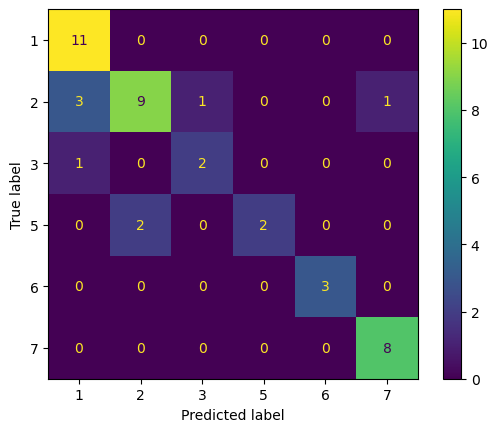

In [11]:
confusion_metrics(classifier,X_test,y_test)

In [12]:
# logging model artifact(Reference - https://github.com/TripathiAshutosh/mlflow/blob/main/MLFlow%20Model%20Serving%20Live%20Demo.ipynb)
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_matrix')
            
    
        
        mlflow.set_tag("tag1", "RandomForestClassifier")
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

Now, It is mandatory to save the artifact to a DB to be able to register the model

Run the command 
```
mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000
```

In [14]:

experiment_name = "glass_type_classifier"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="glass_type_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,metrics,classifier,'confusion_mtx.png')

INFO: 'glass_type_classifier07-03-23' does not exist. Creating a new experiment
Run - glass_type_classifier_07-03-23 is logged to Experiment - glass_type_classifier07-03-23


In [15]:
# adding model to registry
import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
        "runs:/5a00c250465e49a887dcac904d382430/model",
        "random_classifier_model"
    )


Successfully registered model 'random_classifier_model'.
Created version '1' of model 'random_classifier_model'.


Fetching Model from registry

In [16]:
#fetching model from registry
import mlflow.pyfunc

model_name = "random_classifier_model"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test)
print(y_pred_prob)

[1 7 1 7 2 2 1 2 2 3 6 2 1 2 6 5 7 1 1 6 2 7 7 7 3 2 1 1 2 1 1 2 3 2 1 7 5
 1 1 7 1 7 1]
[[0.91 0.09 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.98]
 [0.86 0.12 0.02 0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.99]
 [0.04 0.81 0.07 0.02 0.   0.06]
 [0.01 0.76 0.04 0.08 0.09 0.02]
 [0.99 0.01 0.   0.   0.   0.  ]
 [0.36 0.64 0.   0.   0.   0.  ]
 [0.07 0.93 0.   0.   0.   0.  ]
 [0.32 0.31 0.34 0.   0.02 0.01]
 [0.   0.16 0.   0.2  0.38 0.26]
 [0.   0.52 0.02 0.39 0.04 0.03]
 [0.51 0.49 0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.07 0.03 0.   0.82 0.08]
 [0.   0.25 0.   0.72 0.03 0.  ]
 [0.07 0.04 0.01 0.05 0.18 0.65]
 [0.82 0.04 0.1  0.   0.04 0.  ]
 [0.87 0.04 0.07 0.01 0.   0.01]
 [0.19 0.21 0.05 0.04 0.34 0.17]
 [0.2  0.49 0.19 0.09 0.   0.03]
 [0.   0.02 0.01 0.05 0.06 0.86]
 [0.02 0.02 0.01 0.05 0.03 0.87]
 [0.   0.02 0.02 0.04 0.05 0.87]
 [0.22 0.2  0.58 0.   0.   0.  ]
 [0.31 0.51 0.04 0.01 0.04 0.09]
 [0.93 0.05 0.02 0.   0.   0.  ]
 [0.87 0.12 0.01 0. 

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [17]:
#Transitioning an MLflow Model’s Stage
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="random_classifier_model",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1678168144067, current_stage='Production', description='', last_updated_timestamp=1678168305846, name='random_classifier_model', run_id='5a00c250465e49a887dcac904d382430', source='./artifacts/1/5a00c250465e49a887dcac904d382430/artifacts/model', status='READY', status_message='', user_id='', version='1'>

In [18]:
# predicting from model staged to production
import mlflow.pyfunc

model_name = "random_classifier_model"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

[1 7 1 7 2 2 1 2 2 3 6 2 1 2 6 5 7 1 1 6 2 7 7 7 3 2 1 1 2 1 1 2 3 2 1 7 5
 1 1 7 1 7 1]


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [19]:
#serving model from model registry
mlflow.set_tracking_uri('http://localhost:5000')


RUNNING the following command
```
export MLFLOW_TRACKING_URI=http://localhost:5000
````
Then
```
Run the following command inside the directory of artifacts
mlflow models serve --model-uri models:/random_classifier_model/Production -p 1234 --no-conda
```

In [32]:
import requests

inference_request = {
        "dataframe_records": [[1.5159, 12.82, 3.52, 1.9, 72.86, 0.69, 7.97, 0.0, 0.0]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response)

<Response [500]>


In [ ]:
response.text

In [ ]:
! curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"RI\", \"Na\", \"Mg\", \"density\", \"Al\", \"Si\", \"pH\", \"K\", \"Ca\", \"Ba\", \"Fe\"],\"data\":[[1.5159, 12.82, 3.52, 1.9, 72.86, 0.69, 7.97,0.0, 0.0]]}" http://127.0.0.1:1234/invocations


Reference
https://github.com/TripathiAshutosh/mlflow/blob/main/MLFlow%20Model%20Serving%20Live%20Demo.ipynb